# Exercise Set 3: Strings, requests and APIs

*Morning, August 13, 2019*

In this exercise set you will be working with collecting from the web. We will start out with some basic string operations and build on that to make a query for fetching data.

In addition to DataCamp, you might find [this page](https://pythonprogramming.net/string-concatenation-formatting-intermediate-python-tutorial/) on pythonprogramming.net useful. [This page](https://www.python-course.eu/python3_sequential_data_types.php) give an introduction to the basics of strings and their related data types. 

## Exercise Section 3.1: Basic string operations and dictionaries

Strings have multiple operations and functions associated. In this exercise we investigate a few of these. We also explore the sequence form of a string and how it can be sliced and accessed via indices.

> **Ex. 3.1.1**: Let `s1='Chameleon'` and `s2='ham'`. Check whether the string `s2` is a substring of `s1`. Is `'hello'` a substring `'goodbye'`?

> *Hint*: One string operation is to check whether a string `S` contains a substring `T`, this can be done with the `in` operator: `S in T`. 

In [5]:
# [Answer to Ex. 3.1.1]

In [4]:
s1 = 'Chameleon'
s2 = 'ham'

print(s2 in s1)

print('hello' in 'goodbye')

True
False


> **Ex. 3.1.2**: From the string `s1` select the last four characters. What is the index of the character `a` in `s1`?

> *Hint*: We can selecting a substring by slicing it with the `[]` notation, from the start to end where start is included and end is excluded. Recall that Python has zero-based indexing, see explanation [here](https://softwareengineering.stackexchange.com/questions/110804/why-are-zero-based-arrays-the-norm).


In [5]:
# [Answer to Ex. 3.1.2]

In [7]:
print(s1[-4:])

print(s1.index('a'))

leon
2


In addition to the techniques above, strings are equipped with an array of _methods_, for solving more complex tasks. 

For example the `str.join(list)` method will insert a string in between each element of a list. 

Oppositely `str1.split(str2)` splits `str1` into a list. 

The technique `.strip()` removes spaces in the beginning and end of a word. 

Finally, `.format()` fills in specified blanks in a string.  Below we illustrate the use of each function

```python
>>> ','.join(['a','b']) 
'a,b'

>>> ' Hello World! '.strip() 
'Hello World!'

>>> 'Hello {w}'.format(w='World!') 
'Hello World!'

>>> 'a,b,c'.split(',') 
['a','b','c']
```

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [5]:
# [Answer to Ex. 3.1.3]

In [32]:
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']
l2 = [l1[x].strip() for x in range(len(l1))]
' '.join([l2[1], l2[0], l2[2], l2[-2]])+l2[-1]

'Is r > g?'

### Dictionaries

Dictionaries (or simply dicts) are a central building block of python. Python dicts are constructed from pairs of keys and values making them extremely versatile for data storage. Furthermore dicts correspond directly to the json file format.  

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [7]:
# [Answer to Ex. 3.1.4]

In [49]:
words = {}
keys = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
vowels = ['a', 'e', 'i', 'o', 'u', 'y']

#def my_fun(key, vowels):
#    return key[0] in vowels

#for i in keys:
#    words[i] = my_fun(i, vowels)

for i in keys:
    words[i] = i[0] in vowels
    
print(words)

{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.1.5:** Loop through the dictionary `words`. In each iteration you should print a proper sentence stating if the current word begins with a vowel or not. 

> _Hint:_ You can loop through both keys and values simultaneously with the `.items()` method. [This](https://www.tutorialspoint.com/python/python_dictionary.htm) might help you.

In [9]:
# [Answer to Ex. 3.1.5]

In [56]:
for key in keys:
    if words[key]==True:
        print("{word} begins with vowel!".format(word=key.capitalize()))
    else:
        print("No... {word} does not begin with a vowel...".format(word=key.capitalize()))

Animal begins with vowel!
No... Coffee does not begin with a vowel...
No... Python does not begin with a vowel...
Unit begins with vowel!
No... Knowledge does not begin with a vowel...
No... Tread does not begin with a vowel...
Arise begins with vowel!


<br>

## Exercise Section 3.2: The punk API
The [punk API](https://punkapi.com/) serves information about _beers_. It is a well made and well documented API which makes it great for learning about APIs. 

> **Ex. 3.2.1:** Read the documentation on the Punk API available [here](https://punkapi.com/documentation/v2). What is the server url (i.e. root endpoint) of the Punk API? Does it require authentication? Then use the Punk API to make a request for beers brewed before December, 2008 with an ABV of at least 8.

In [11]:
# [Answer to Ex. 3.2.1]

In [59]:
import requests

url = "https://api.punkapi.com/v2/beers?brewed_before=12-2008&abv_gt=8"

response = requests.get(url)
response.text

> **Ex. 3.2.2:** What object type is the API's JSON response? What about the individual items in the container? Convert the response object to a suitable format and answer the following questions:
>> 1) How many beers are in the JSON object?
>>
>> 2) Print the names of the beers in the JSON object using lower case characters.
>>
>> 3) Select the beer called Paradox Islay from the JSON object.
>>
>> 4) Which hop ingredients does the Paradox Islay contain?


In [120]:
import pandas as pd
response_json = response.json()

print("There are {number} beers satisfying criteria.".format(number=len(response_json)))

names=[]
for i in range(len(response_json)):
    if i<len(response_json)-1:
        names.append(response_json[i]['name'])
    else:
        names.append("and " + response_json[i]['name'])
    
print("The names of the beers are " + ', '.join(names))

pi = response_json[names.index('Paradox Islay')]
hops=[]
for i in range(len(pi['ingredients']['hops'])):
    if i<len(pi['ingredients']['hops'])-1:
        hops.append(pi['ingredients']['hops'][i]['name'])
    else:
        hops.append("and " + pi['ingredients']['hops'][i]['name'])

hops = list(dict.fromkeys(hops))        
        
print("The different types of hops used in Paradox Islay are " + ', '.join(hops))

#train = pd.DataFrame.from_dict(response_json)
#train

There are 4 beers satisfying criteria.
The names of the beers are Zephyr, Paradox Islay, Coffee Imperial Stout, and AB:03
The different types of hops used in Paradox Islay are Columbus, Saaz, and First Gold


> **Ex. 3.2.3:** Save the beers as a JSON file on your machine.

> _Hint:_ you might want to take a look at the [json](https://docs.python.org/3/library/json.html) module.


In [15]:
# [Answer to Ex. 3.2.3]

In [122]:
import json
response_json_str = json.dumps(response_json)

with open('my_file.json', 'w') as f:
    f.write(response_json_str)

<br>

## Exercise Section 3.3: The DST API

DST (Statistics Denmark) provide an API access to their aggregate data. For developers they supply a [console](https://api.statbank.dk/console) for testing. In this exercise we will first code up a simple script which can collect data from the DST API, and then introduce the [PyDST](https://kristianuruplarsen.github.io/PyDST/) package. 

> **Ex 3.3.1:** Use the API console to construct a GET request which retrieves the table FOLK1A split by quarter. The return should be in JSON format. We want all available dates.
>
>Then write a function `construct_link()` which takes as inputs: a table ID (e.g. `'FOLK1A'`) and a list of strings like `['var1=*', 'var2=somevalue']`. The function should return the proper URL for getting a dataset with the specified variables (e.g. in this case all levels of var1, but only where var2=somevalue).

> _Hint:_ The time variable is called 'tid'. To select all available values, set the value-id to '*'. Spend a little time with the console to get a sense of how the URLs are constructed.


In [17]:
# [Answer to Ex. 3.3.1]

In [134]:
"https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*"

def construct_link(table_id, variables):
    v = '&'.join(variables)
    url = "https://api.statbank.dk/v1/data/"+table_id+"/JSONSTAT?lang=en&"+v
    return url

table_id = 'FOLK1A'
variables = ['Tid=*']

url = construct_link(table_id, variables)

When executing the request in the console you should get a json file as output. Next lets write some code to load these json files directly into python. 


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.

> _Hint:_ The `requests.response` object has a `.json()` method. 

In [135]:
# [Answer to Ex. 3.3.2]

In [189]:
table_id = 'FOD'
variables = ['Tid=*', 'BARNKON=P']

def get_data(table_id, variables):
    url = construct_link(table_id, variables)
    response = requests.get(url)
    return response.json()['dataset']

data = get_data(table_id, variables)

> **Ex. 3.3.3:** Extract the number of girls born each year. Store the results as a list.

In [190]:
# [Answer to Ex. 3.3.3]

In [191]:
girls=data['value']
girls

[34996,
 34771,
 35260,
 31533,
 30055,
 30161,
 28909,
 27941,
 25972,
 25595,
 24821,
 25228,
 26284,
 26878,
 27142,
 28520,
 29876,
 30813,
 31353,
 32914,
 32760,
 34027,
 33885,
 32819,
 32899,
 32116,
 32341,
 32652,
 31961,
 31109,
 31441,
 31539,
 31459,
 31580,
 31267,
 31507,
 30557,
 30946,
 28984,
 28131,
 27283,
 27616,
 28357,
 29833,
 29930,
 29865,
 29648,
 29762]

> **Ex.3.3.4:** Repeat 3.3.2 and 3.3.3 but this time only get boy births (BARNKON=D). Store the numbers in a new list and use the `plot_births` (supplied below) function to plot the data. If you don't already have matplotlib installed run `pip install matplotlib`.

In [198]:
# Just run this once, do not change it.
import matplotlib.pyplot as plt 

def plot_births(boys, girls):
    """ Plots lineplot of the number of births split by gender.
    
    Args: 
        boys: a list of boy births by year
        girls: a list of girl births by year
    """
    if not len(boys) == len(girls):
        raise ValueError('There must be the same number of observations for boys and girls')
    
    labels = ['{y}'.format(y=year) for year in range(1974,2021)]
    
    plt.plot(range(len(boys)), boys, color = 'blue', label = 'boys')
    plt.plot(range(len(boys)), girls, color = 'red', label = 'girls')
    plt.xticks([i for i in range(len(boys)) if i%4 == 0], [l for i,l in zip(range(len(boys)),labels) if i%4 == 0],
               rotation = 'vertical')
    plt.legend()
    plt.show()

In [199]:
# [Answer to Ex. 3.3.4]

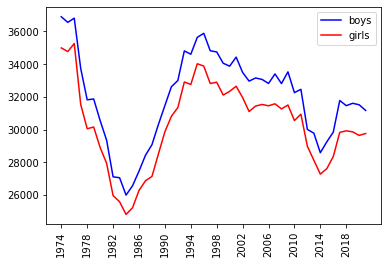

In [200]:
table_id = 'FOD'
variables = ['Tid=*', 'BARNKON=D']
             
data = get_data(table_id, variables)

boys=data['value']
boys

plot_births(boys, girls)             

In [197]:
years = ['{y}'.format(y=year) for year in range(1974,2021)]
data_tuples = list(zip(boys,girls,years))
df = pd.DataFrame(data_tuples, columns=['Boys','Girls','Year'])
df = df.set_index('Year')
df['diff']=(df['Boys']-df['Girls'])/df['Girls']
df

,Boys,Girls,diff
Year,,,
1974,36899,34996,0.054378
1975,36556,34771,0.051336
1976,36811,35260,0.043988
1977,33734,31533,0.069800
1978,31823,30055,0.058825
1979,31875,30161,0.056828
1980,30555,28909,0.056937
1981,29352,27941,0.050499
1982,27117,25972,0.044086


>**(Bonus question) Ex. 3.3.5:** Go to [https://kristianuruplarsen.github.io/PyDST/](https://kristianuruplarsen.github.io/PyDST/) follow the installation instructions and import PyDST. Try to replicate the birth figure from 3.3.4 using PyDST. Use [the documentation](https://kristianuruplarsen.github.io/PyDST/connection) to learn how the package works.

> _Hint:_ PyDST does not use json or dicts as its primary data format, instead it uses pandas DataFrames. When you install PyDST it will install pandas as a dependency. If this doesn't work simply run `pip install pandas` in your console. DataFrames are very intuitive to work with, for example accessing a column named 'name' is simply `data['name']` or `data.name`.
>
> In the next session you will learn more about pandas and DataFrames. If you are more comfortable with dicts, the data_response class has a `.dict` method you can use. 

In [26]:
# [Answer to Ex. 3.3.5]